In [196]:
import laspy
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as clr
plt.style.use('seaborn-whitegrid')

In [2]:
%matplotlib notebook

In [3]:
inFile = laspy.file.File("/Users/vasilii.mosin/Desktop/ForestHype/data/lidar/thd_000026.las", mode= "r")

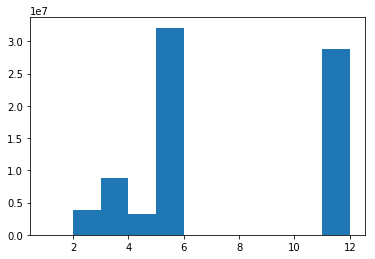

In [25]:
plt.hist(inFile.Classification, 11)
plt.show()

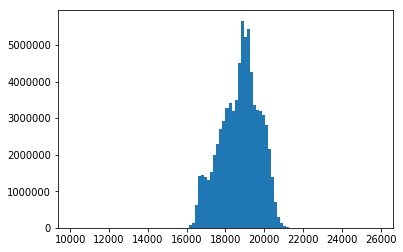

In [24]:
plt.hist(inFile.Z, 100)
plt.show()

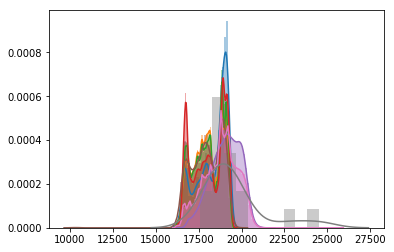

In [44]:
sns.distplot(inFile.Z[np.where(inFile.Classification==1)])
sns.distplot(inFile.Z[np.where(inFile.Classification==2)])
sns.distplot(inFile.Z[np.where(inFile.Classification==3)])
sns.distplot(inFile.Z[np.where(inFile.Classification==4)])
sns.distplot(inFile.Z[np.where(inFile.Classification==5)])
sns.distplot(inFile.Z[np.where(inFile.Classification==7)])
sns.distplot(inFile.Z[np.where(inFile.Classification==11)])
sns.distplot(inFile.Z[np.where(inFile.Classification==12)])
plt.show()

## Example Crown Delineation

In [3]:
import rasterio
from thresholding_watershed import itcd as itcd_tw
from skimage.exposure import rescale_intensity
from to_shapefile import crowns_segments

In [297]:
hyper_dataset = rasterio.open('../data/temp/hyper_3.tif')
lidar_dataset = rasterio.open('../data/lidar/chm_3.tif')

In [298]:
hyper_image = hyper_dataset.read(1)
hyper_image = rescale_intensity(1.0*hyper_image)

lidar_image = lidar_dataset.read(1)
lidar_image = rescale_intensity(lidar_image)

In [299]:
crowns_hyper = itcd_tw(hyper_image, min_distance=10, smoothing=2, thres_coef=0.6)
crowns_lidar = itcd_tw(lidar_image, min_distance=1, smoothing=0.6, thres_coef=0.0)

In [300]:
cmap = clr.ListedColormap(np.random.rand(1000,3))

<IPython.core.display.Javascript object>


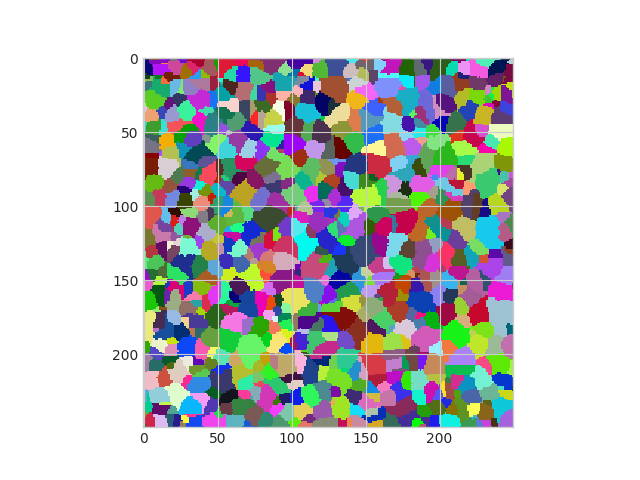

In [301]:
plt.imshow(crowns_lidar, cmap)
plt.show()

In [304]:
print(np.max(crowns_lidar))

763


## Detected Crown Statistics

In [305]:
mean_heights_hyper = [np.mean(hyper_image[np.where(crowns_hyper==i)]) for i in range(1,np.max(crowns_hyper)+1)]
mean_heights_lidar = [np.mean(lidar_image[np.where(crowns_lidar==i)]) for i in range(1,np.max(crowns_lidar)+1)]

<IPython.core.display.Javascript object>


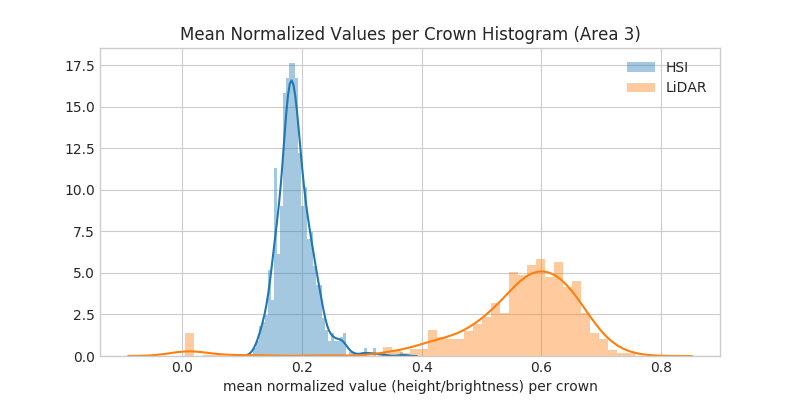

In [306]:
plt.figure(figsize=(8,4))
sns.distplot(mean_heights_hyper, 50, label='HSI')
sns.distplot(mean_heights_lidar, 50, label='LiDAR')
plt.title('Mean Normalized Values per Crown Histogram (Area 3)')
plt.xlabel('mean normalized value (height/brightness) per crown')
plt.legend()
plt.show()

In [307]:
crown_sizes_hyper = [len(hyper_image[np.where(crowns_hyper==i)])*0.01 for i in range(1,np.max(crowns_hyper)+1)]
crown_sizes_lidar = [len(lidar_image[np.where(crowns_lidar==i)])*0.16 for i in range(1,np.max(crowns_lidar)+1)]

<IPython.core.display.Javascript object>


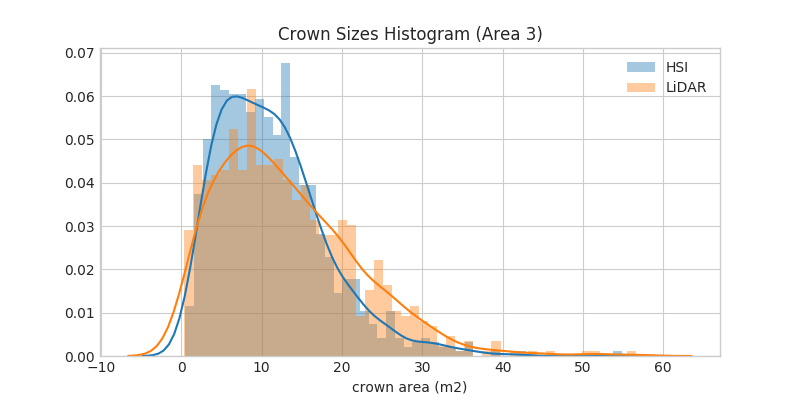

In [308]:
plt.figure(figsize=(8,4))
sns.distplot(crown_sizes_hyper, 50, label='HSI')
sns.distplot(crown_sizes_lidar, 50, label='LiDAR')
plt.title('Crown Sizes Histogram (Area 3)')
plt.xlabel('crown area (m2)')
plt.legend()
plt.show()

In [267]:
attr_hyper = {'size': ('float', crown_sizes_hyper), 'height': ('float', mean_heights_hyper)}
attr_lidar = {'size': ('float', crown_sizes_lidar), 'height': ('float', mean_heights_lidar)}

In [268]:
crowns_segments('test_shape/hyper_1', crowns_hyper, hyper_dataset, attr=attr_hyper)
crowns_segments('test_shape/lidar_1', crowns_lidar, lidar_dataset, attr=attr_lidar)